# Production Efficiency Analysis
This notebook demonstrates an analysis of **production efficiency** in a manufacturing setting.

We explore how different factors like **machine type, operator, material type, shift, errors and energy consumption** affect overall efficiency and output.

The main goals of this project are:
- **Analyze efficiency per machine and shift**
- **Investigate downtime and errors**
- **Understand energy usage patterns**
- **Visualize relationships and patterns** using charts and plots
- **Predict operator efficiency** using **Linear Regression** and **Random Forest** models

*This analysis simulates a realistic factory dataset*

# 1. Importing and Loading Data
We will start by importing the dataset and reviewing its structure

In [4]:
#Upload of CSV file(Google Colab only)
from google.colab import files
uploaded = files.upload()

Saving production_data.csv to production_data (1).csv


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
data = pd.read_csv("production_data.csv")

#Preview data
print("First 5 rows: ")
display(data.head())

#Check for missing values
print("\nMissing values: ")
print(data.isnull().sum())


First 5 rows: 


,Date,MachineID,MachineType,OperatorID,MaterialType,Shift,OperatorEfficiency,Downtime(min),Errors,Energy(kWh),UnitsProduced
0,2025-11-01,A,Lathe,Op3,Steel,Day,0.785,19,7,277.8,797
1,2025-11-01,A,Lathe,Op3,Steel,Evening,0.775,23,6,331.6,804
2,2025-11-01,A,Lathe,Op3,Steel,Night,0.780,26,4,288.4,759
3,2025-11-01,B,Milling,Op1,Steel,Day,0.780,16,9,247.7,817
4,2025-11-01,B,Milling,Op1,Steel,Evening,0.705,31,9,295.0,699



Missing values: 
Date                  0
MachineID             0
MachineType           0
OperatorID            0
MaterialType          0
Shift                 0
OperatorEfficiency    0
Downtime(min)         0
Errors                0
Energy(kWh)           0
UnitsProduced         0
dtype: int64


#2. Data Overview and Statistics
Before making visualizations, its important to check basic statistics and make sure all data columns look reasonable.

In [ ]:
#General info
data.info()

#Basic statistics
print("\nStatistical summary: ")
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                180 non-null    object 
 1   MachineID           180 non-null    object 
 2   MachineType         180 non-null    object 
 3   OperatorID          180 non-null    object 
 4   MaterialType        180 non-null    object 
 5   Shift               180 non-null    object 
 6   OperatorEfficiency  180 non-null    float64
 7   Downtime(min)       180 non-null    int64  
 8   Errors              180 non-null    int64  
 9   Energy(kWh)         180 non-null    float64
 10  UnitsProduced       180 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 15.6+ KB

Statistical summary: 


,OperatorEfficiency,Downtime(min),Errors,Energy(kWh),UnitsProduced
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.778806,26.311111,4.316667,303.367778,783.405556
std,0.059077,12.236172,2.783581,21.715069,73.262191
min,0.700000,5.000000,0.000000,230.400000,630.000000
25%,0.725000,15.750000,2.000000,289.000000,726.750000
50%,0.775000,26.500000,4.000000,303.450000,783.000000
75%,0.816250,36.000000,7.000000,319.525000,834.250000
max,0.925000,49.000000,9.000000,347.800000,991.000000


#3. Visualizing Efficiency, Downtime, Energy and Errors
Plots help us notice patterns that are not obvious in raw tables.

Here we will visualize efficiency, downtime, energy and errors from different perspectives

#3.1 Operator Efficiency per Machine Type
This chart shows the average efficiency for each machine type(Lathe, Milling, Drill).

It helps us see which machine type performs better overall.

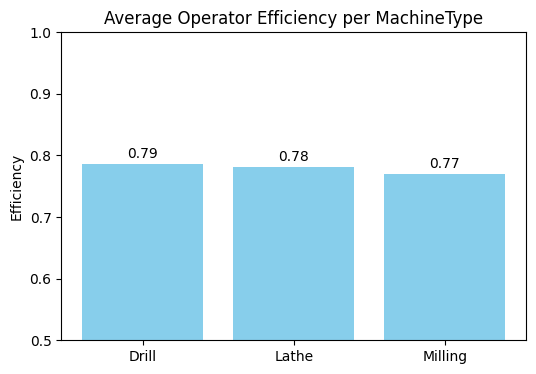

In [ ]:
machine_avg = data.groupby('MachineType')['OperatorEfficiency'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
plt.bar(machine_avg.index, machine_avg.values, color='skyblue')
plt.title('Average Operator Efficiency per MachineType')
plt.ylabel('Efficiency')

# Add numbers above bars
for i, val in enumerate(machine_avg):
    plt.text(i, val + 0.005, f"{val:.2f}", ha='center', va='bottom')

plt.ylim(0.5, 1.0)
plt.show()


From the bar chart, we can see that **Drill machines** have the highest operator efficiency, followed by **Lathe** then **Milling machines**.

This suggests that operators are more effective when using **Drill machines**.

#3.2 Operator Efficiency per Shift
Different shifts(Morning, Afternoon, Night) can have varying performance due to fatigue or staffing differences.

We can check which shift has the highest average efficiency.

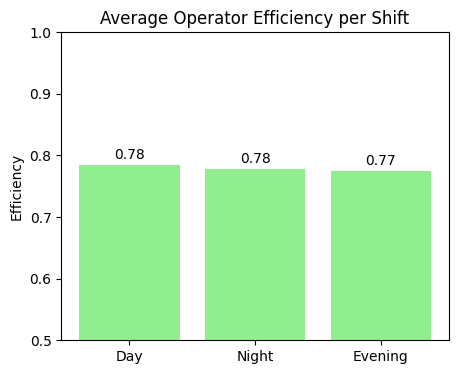

In [5]:
shift_avg = data.groupby('Shift')['OperatorEfficiency'].mean().sort_values(ascending=False)

plt.figure(figsize=(5,4))
plt.bar(shift_avg.index, shift_avg.values, color='lightgreen')
plt.title('Average Operator Efficiency per Shift')
plt.ylabel('Efficiency')

for i, val in enumerate(shift_avg):
    plt.text(i, val + 0.005, f"{val:.2f}", ha='center', va='bottom')

plt.ylim(0.5, 1.0)
plt.show()

The chart shows that **Day shift** has highest efficinency on average, while the **Evening shift** is the lowest.

#3.3 Operator Efficiency per Operator
This helps compare operators average performance, which can indicate skill or experience differences.

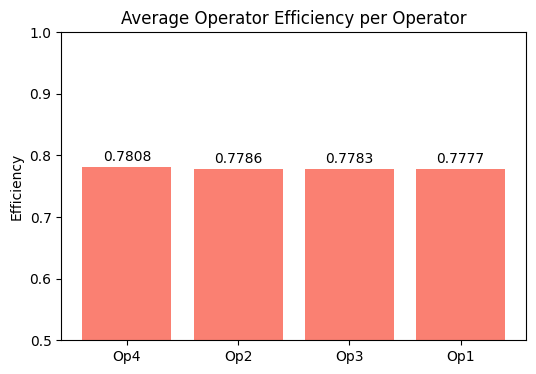

In [ ]:

operator_avg = data.groupby('OperatorID')['OperatorEfficiency'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
plt.bar(operator_avg.index, operator_avg.values, color='salmon')
plt.title('Average Operator Efficiency per Operator')
plt.ylabel('Efficiency')

# Add numbers
for i, val in enumerate(operator_avg):
    plt.text(i, val + 0.005, f"{val:.4f}", ha='center', va='bottom')

plt.ylim(0.5, 1.0)
plt.show()

Operator **Op4** shows the highest efficiency, while **Op1** is the lowest.

This can help in training or workload planning.

#3.4 Errors by Material Type
Different materials can cause more or fewer errors depending on how difficult they are to process.

Here we compare the average number of errors per material type.

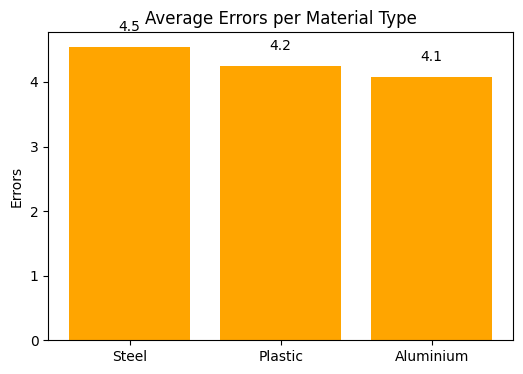

In [ ]:
material_errors = data.groupby('MaterialType')['Errors'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
plt.bar(material_errors.index, material_errors.values, color='orange')
plt.title('Average Errors per Material Type')
plt.ylabel('Errors')

for i, val in enumerate(material_errors):
    plt.text(i, val + 0.2, f"{val:.1f}", ha='center', va='bottom')

plt.show()

**Steel** materials have the most errors, while **Aluminium** has the least.

This indicates material handling or process differences.

#3.5 Downtime Distribution
This plot shows how downtime is distributed across all machines.

Most values are likely near average, but outliners may indicate maintenance problems.

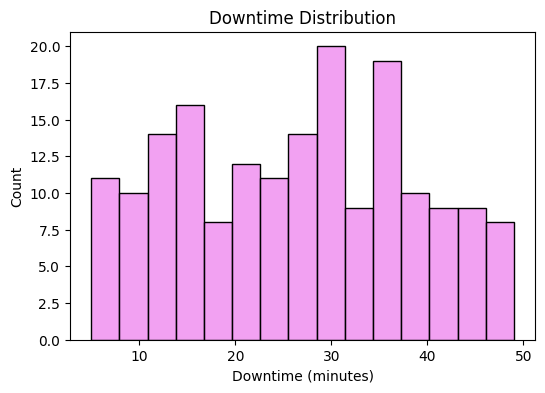

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data['Downtime(min)'], bins=15, color='violet', kde=False)
plt.title('Downtime Distribution')
plt.xlabel('Downtime (minutes)')
plt.ylabel('Count')
plt.show()

Most machines have downtime between 5-30 minutes, with few extreme values.

#3.6 Energy Consumption per Shift
We compare the average energy used in each shift.

Higher energy consupmtion may indicate higher productivity, or simply inefficiency.

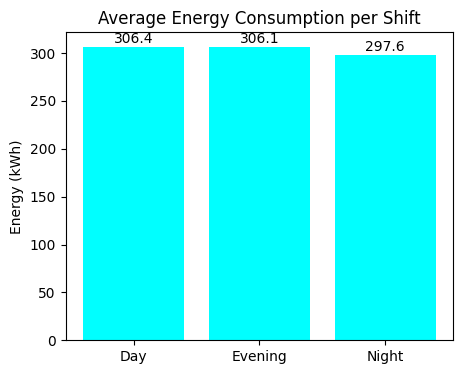

In [ ]:
energy_shift = data.groupby('Shift')['Energy(kWh)'].mean().sort_values(ascending=False)

plt.figure(figsize=(5,4))
plt.bar(energy_shift.index, energy_shift.values, color='cyan')
plt.title('Average Energy Consumption per Shift')
plt.ylabel('Energy (kWh)')

for i, val in enumerate(energy_shift):
    plt.text(i, val + 1, f"{val:.1f}", ha='center', va='bottom')

plt.show()

**Day** and **Evening** shifts consume similar amounts of energy, while **Night** shift uses the least.

This may be due to lower activity levels at night.

#3.7 Units produced per Material
This shows how productive each material type is, in terms of the average number of units produced.

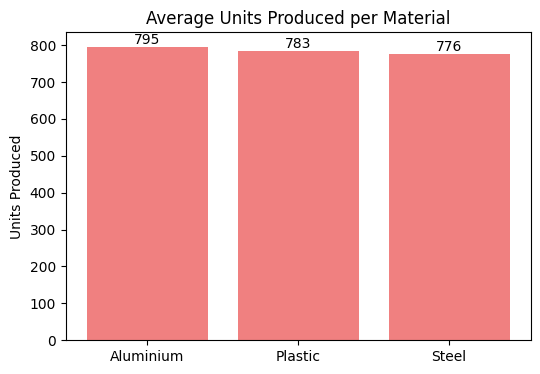

In [ ]:
units_material = data.groupby('MaterialType')['UnitsProduced'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
plt.bar(units_material.index, units_material.values, color='lightcoral')
plt.title('Average Units Produced per Material')
plt.ylabel('Units Produced')

for i, val in enumerate(units_material):
    plt.text(i, val + 1, f"{val:.0f}", ha='center', va='bottom')

plt.show()

**Aluminium** has the highest units produced on average, while **Steel** is the lowest.

#3.8 Correlation Heatmap
This heatmap shows how strongly different numerical variables are related.
For example, a negative correlation between Downtime and Efficiency means that more downtime usually lowers efficiency.

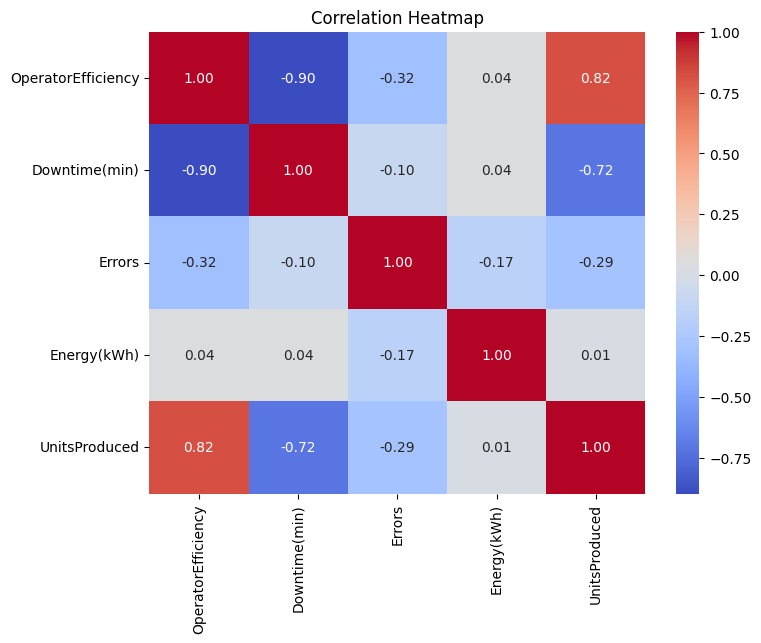

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#Few examples of correlation:
- Units produced and Operator efficiency: 0.82 - strong positive correlation
- Downtime and Units produced: -0.29 - moderate negative correlation
- Efficiency and errors: -0.32 - higher errors reduce efficiency
- Energy and errors: -0.17 - slight negative correlation


##4. Key insights
1. Drill machines are the most efficient, Milling the least.
2. Day shift outperforms Evening shift by slight margin in operator efficiency.
3. Operator Op4 has the highest efficiency, Op1 the lowest.
4. Steel materials show the most errors, Aluminium the least.
5. Most of downtime is between 5 and 30 minutes.
6. Night shift consumes least energy.
7. Aluminium has the most units produced, Steel the least.
8. Correlation analysis confirms that higher errors reduce efficiency, more units produced generally align with higher efficiency.

## 5. Predicting Operator Efficiency
We will build two simple models to predict Operator Efficiency based on **Downtime** and **Errors**.

- Linear regression - a simple model that assumes linear relationship.
- Random Forest Regression - a more advanced mored that can capture non Linear patterns and intersections.

This is useful to estimate efficiency for planning or identifying potential issues.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

# Features and target
X = data[['Downtime(min)','Errors']]
y = data['OperatorEfficiency']

#Split data: 20% test, 80% train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

#Train Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

#Predict on test set
y_pred = lin_model.predict(X_test)

#Evaluate model
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"Linear Regression R² score:{r2:.3f}")
print(f"Linear Regression Mean Absolute Error: {mae:.3f}")

#Feature coefficients
print("\nRegression coefficients: ")
for feature, coef in zip(X.columns,lin_model.coef_):
  print(f"{feature}:{coef:.3f}")

Linear Regression R² score:0.984
Linear Regression Mean Absolute Error: 0.006

Regression coefficients: 
Downtime(min):-0.004
Errors:-0.009


### 5.1 Linear Regression Model - Results and interpretation
The Linear Regression model was trained to predict **Operator Efficiency** based on two key production factors:
- **Downtime(min)**
- **Errors**

The model achieved following results:
- **R² Score:** 0.984
- **Mean Absolute Error(MAE):** 0.006
- **Regression Coefficients:**
  
  - Downtime(min): **-0.004**
  - Errors: **-0.009**
### Interpretation
These results show that the model performs very well, explaining about **98.4%** of the variability in operator efficiency.

The negative coefficients mean that as *Downtime* or *Errors* increase, the *Operator Efficiency* decreases, which is exactly what we would expect in a real manufacturing process.

In simple terms:
- Every additional **minute of downtime** reduces efficiency by approximately **0.004%**
- Every additional **error** reduces efficiency by about **0.009%**.

The small **MAE(0.006)** shows that the models predictions are very close to real observed data.

Although this is a simple model, it successfully demonstrates how basic statistical learning can reveal relationships between production factors

### 5.2 Random Forest Regressor - Predicting Operator Efficiency
To explore a more advanced predictive appraoch, we also trained a **Random Forest Regressor** using the same input features:
- **Downtime(min)**
- **Errors**

Random Forest is learning method that builds many decision trees and averages their predictions.

It often handles non-linear relationships and interactions better than linear regression.

We will evaluate its performance using the same metrics: **R² score** and **Mean Absolute Error(MAE)**

In [ ]:
#Import the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error

#Features and target
X = data[['Downtime(min)','Errors']]
y = data['OperatorEfficiency']

#Split dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

#Initialize Random Fores model
rf_model = RandomForestRegressor(n_estimators=100,random_state=33)

#Train the model
rf_model.fit(X_train,y_train)

#Predict on test set
y_pred_rf = rf_model.predict(X_test)

#Evaluate
r2_rf = r2_score(y_test,y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)

print(f"Random Forest R²: {r2_rf:.3f}")
print(f"Random Forest MAE: {mae_rf:.3f}")


Random Forest R²: 0.991
Random Forest MAE: 0.004


## 5.3 Random Forest Regressor - Results and interpretation
### Results
- **R² Score:** 0.991
- **Mean Absolute Error(MAE):** 0.004
### Interpretation
- The model explains **99.1%** of the variability in operator efficiency, slightly better than Linear Regression.
- The very low **MAE** indicates predictions are very close to the actual values.
